<a href="https://www.kaggle.com/code/shilongzhuang/attack-on-titanic-solution-no-data-leakage?scriptVersionId=99255748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Solution Beginner Walkthrough

The purpose of this notebook is to show how I have navigated through the Kaggle Titanic project by following an effective Data Science Workflow.

I will always treat this notebook as a **work in progress** because I will continuously seek to improve my work as I gain more knowledge and understanding throughout my Data Science learning journey.

## Data Science Workflow
> The foundation of this workflow was based on the author's citations in this [notebook](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook). I figured there was still room for more C's.
- **Comprehend.** *Exploratory Data Analysis.* Understand the nature and relationships among each features in the datasets through data analyses and visualization.
- **Correlate.** *Feature Selection* Validate the strength of association across features with the appopriate statistical tools and metrics, and to select the features that are significantly relevant with the solution goal.
- **Clean.** *Data Cleaning.* Identify and remedy missing/null values by imputing them with reasonable inputs.  
- **Create.** *Feature Engineering.* Create new features out of the existing ones which can make better predictions while also reducing noise in the number of features.
- **Classify.** *Feature Engineering.* Practice more advanced feature engineering involving effectively classifying labels/classes that are similar in terms of distribution, which also aims to reduce noise.
- **Convert.** *Data Preprocessing.* Perform the necessary adjustments (one-hot encoding) and data transformations (i.e. sqrt, log trasformations) to make the data fit for modelling.
- **Complete.** *Training Model.* Completion of a working and cleaned dataset in preparation for training the model and predicting solutions out of it. 
- **Configure.** *Hyperparameter Tuning.* Further optimize our learning algorithms by determining and running the optimal parameters. 
- **Combine.** *Ensemble Learning.* Combine multiple algorithms into one that can leverage the strengths and compensates the weaknesses of the tested models.

## Assumptions
To prevent **data leakage and cheating,** analyses and data transformations will exclusively be done and derived based on training data alone without the support of the test data.
> Data leakage happens when information outside of train set was used to assist in creating model. While there is merits to substantially achieve higher scores on our train and validation sets alone, this model will usually result in poorer performances when ran on other testing sets that are **new** and **unseen.** 

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acquire Training and Testing Data

The information regarding the features are explicitly presented [HERE](https://www.kaggle.com/competitions/titanic/data?select=train.csv) in detail.

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
len(test_df)/(len(train_df)+len(test_df))

0.31932773109243695

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations

**Distribution**
- The train-test is split around 70/30, with testing set representing 31.93% of the combined sets.
- The survival rate in context of the training set is at 38.38%, which is representative of the original survival rate of 32.46%, 1502 out of 2224.
- Majority (around 75%) of the people didn't aboard with siblings/spouses.
- The distributions of SibSP and Parch are right skewed, since the means are greater than the medians.

**Data Types**
- Numerical: *Age, Sibsp, Parch, Fare*
- Categorical: *Survival, Sex, Pclass, Embarked*
- Mixed/Alphanumeric: *Name, Ticket, Cabin*

I picked a cold and chilling palette to fit the theme of the project.

In [9]:
# Create and set palette
colors = ['#79DAE8', '#2155CD']
sns.set_palette(sns.color_palette(colors))

# Numerical Features
For the numerical variables, the seaborn **pairplot** will be helpful in presenting the pariwise relationships across each numerical variables. The diagonal plots are the main focus here as they are treated as distribution plots of the features. The rest is just being extra and for eye candy.

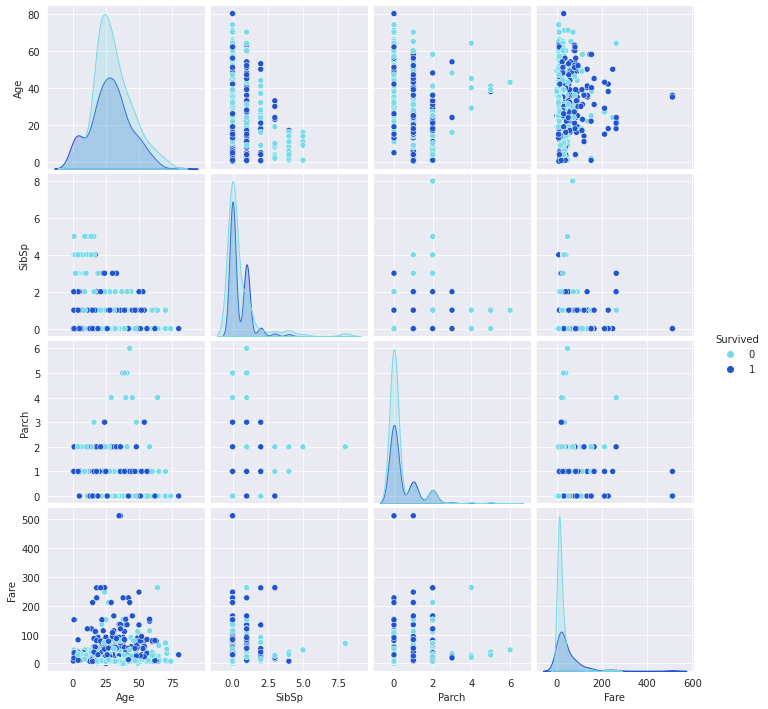

In [10]:
# Separate the training set into groups of numerical and categorical variables.
# Don't worry, the 'Survived' was only included in the numerical category so we can use it to classify the features when we create the pairplot
df_num = train_df[['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Embarked']]

# Classify by 'Survived'
sns.set_style('darkgrid')
sns.pairplot(df_num, hue='Survived')

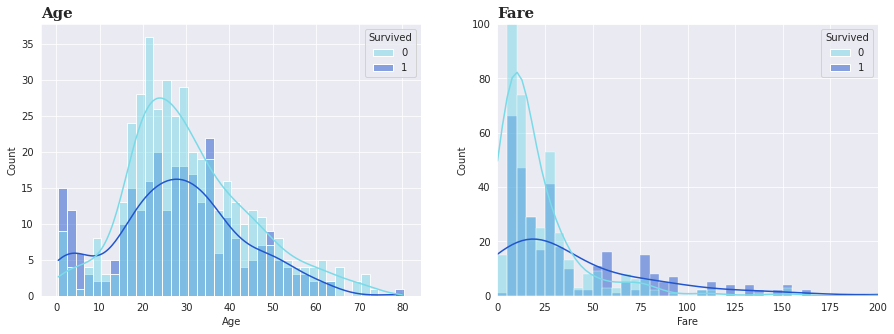

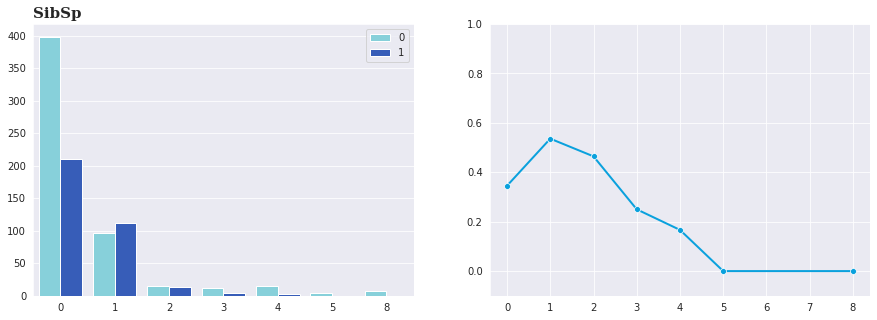

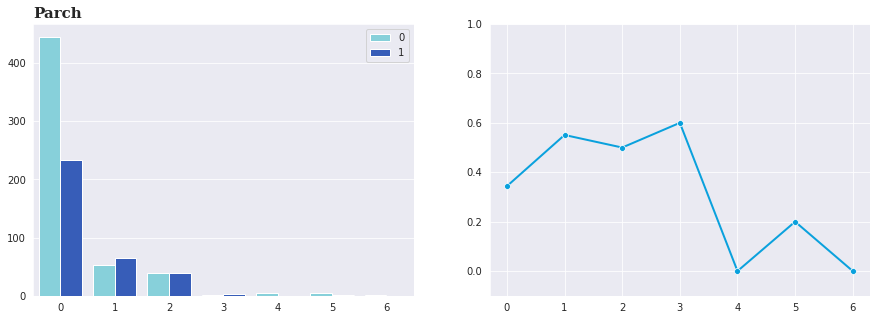

In [11]:
fig= plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1,2,1)
sns.histplot(data=train_df, x="Age", hue="Survived", binwidth=2, kde=True)
plt.title('Age',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')

plt.subplot(1,2,2)
sns.histplot(data=train_df, x="Fare", hue="Survived", binwidth=5, kde=True)
plt.title('Fare',
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')

# Zoomed along the axes for clearer observation of Fare distribution
plt.xlim([0, 200])
plt.ylim([0, 100])

# Define a function to create countplots with the desired style and format
def count_plot(df, x, y):
    fig = plt.figure(figsize = (15, 5))
    
    plt.subplot(1,2,1)
    ax = sns.countplot( x=df[x].dropna(), hue=df[y], palette=['#79DAE8', '#2155CD'])
    plt.legend(loc='upper right')
    plt.title(str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    ax.set(xlabel=None, ylabel=None)
    
    plt.subplot(1,2,2)
    plt.ylim(-0.1, 1)
    ax = sns.lineplot(x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o", color='#0AA1DD')
    ax.set(xlabel=None, ylabel=None)
    
    plt.show()

count_plot(train_df, 'SibSp', 'Survived')
count_plot(train_df, 'Parch', 'Survived')

**Age**
- More normally distributed compared to the rest.
- Majority of passengers fall in the 20-35 age bracket.
- A large number of 20-30 yr olds didn't survive.
- Infants (age<4) had one of the highest survival rates.
- The oldest individual (age=80) survived.

**SibSp**
- Those with 1-2 siblings/spouses were likely to survive.
- Large number of passengers didn't have siblings/spouses with them.
- An outlier, with over 8 siblings/spouses, didn't survive.

**Parch**
- Those with 1-3 parents/children were likely to survive
- Large number of passengers didn't have parents/children with them.
- Passengers without parents and children with them were more likely to die.

**Fare**
- Skewed to the right.
- Majority of the passengers aboarded with cheaper fares.
- Most passengers with cheaper fares (<50) didn't survive, while those who paid higher fares (>300) tend to survive.

## Correlating Numerical Features

<AxesSubplot:>

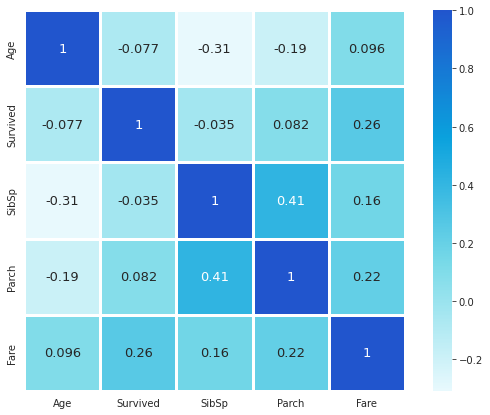

In [12]:
import matplotlib.colors

# Assign palette to cmap in sns.heatmap
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#E8F9FD', '#79DAE8', '#0AA1DD', '#2155CD'])

plt.subplots(figsize=(10,7))
sns.heatmap(df_num.corr(), cmap=cmap, annot=True, linewidths=3, annot_kws={"fontsize":13}, square=True)

## Trasnforming Numerical Features
The **probability plot** or **quantile-quntile plot (QQplot)** allows us to plot our sample data against the quantiles of a normal distribution. This will serve as reference to see how our subsequent data transformations react to the curve, and enable us to select the best form of transformation which resulted to the best fit.

We can try use the following data transformation techniques:
- Square Root
- Cube Root
- Logarithmic. **Log(x+1)** wil ensure the log transformation won't result in undefined values because our data contains 'zero' values, and log(0) returns undefined.

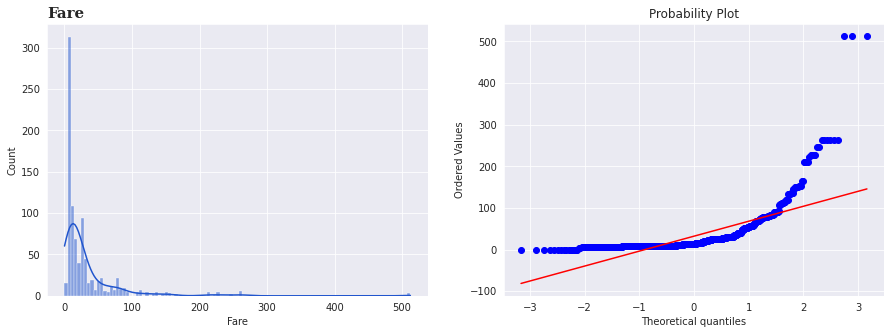

In [13]:
import scipy.stats as stats

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    plt.figure(figsize = (15, 5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col].dropna(), color='#2155CD', kde=True)
    plt.title(str(col),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    
QQplot(train_df, 'Fare')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

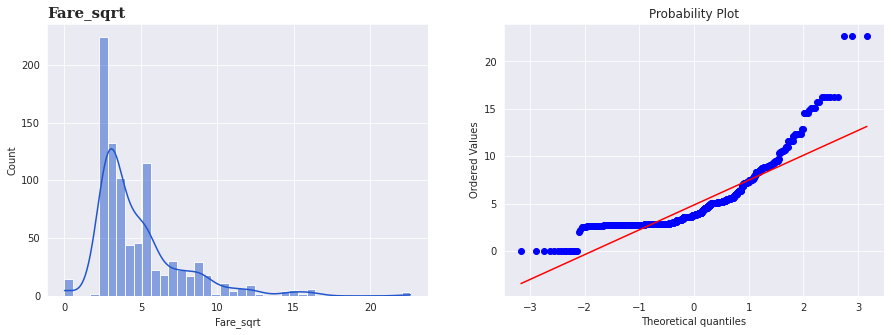

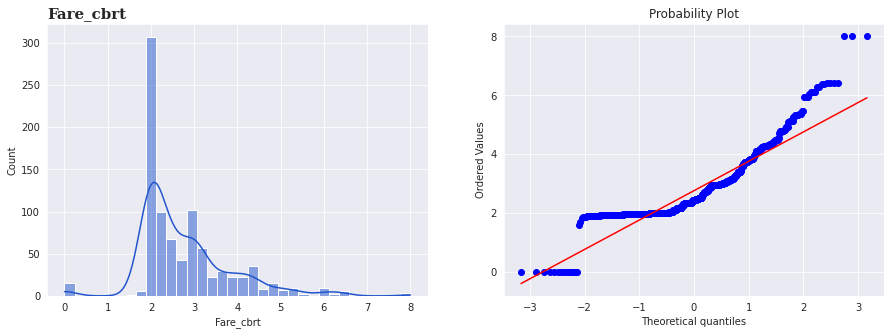

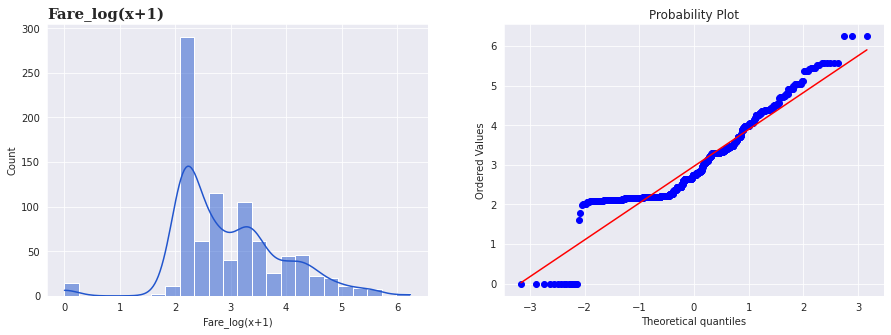

In [14]:
# Transform Fare and compare
tr_Fare = train_df[['Survived', 'Fare']]

tr_Fare["Fare_sqrt"] = tr_Fare['Fare']**(1./2)
QQplot(tr_Fare, 'Fare_sqrt')

tr_Fare["Fare_cbrt"] = tr_Fare['Fare']**(1./3)
QQplot(tr_Fare, 'Fare_cbrt')

tr_Fare["Fare_log(x+1)"] = np.log(tr_Fare['Fare'] + 1)
QQplot(tr_Fare, 'Fare_log(x+1)')

<AxesSubplot:>

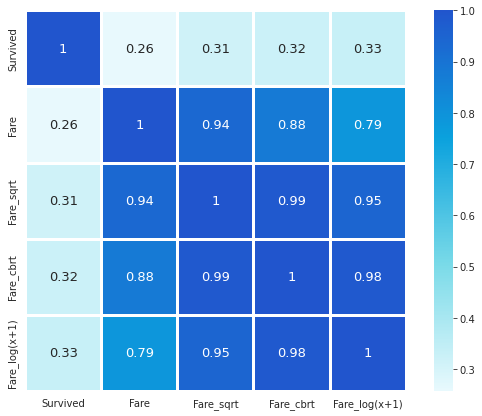

In [15]:
plt.subplots(figsize=(10,7))
sns.heatmap(tr_Fare.corr(), cmap=cmap, annot=True, linewidths=3, annot_kws={"fontsize":13}, square=True)

**Conclusion.** Transform *Fare* with Log(x+1) because it yielded the best fit and correlation.

# Categorical Features

Let's use **countplots** to visualize the distribution of each classification with respect to survival, and **lineplots** to determine the corresponding survival rates (in % form). 

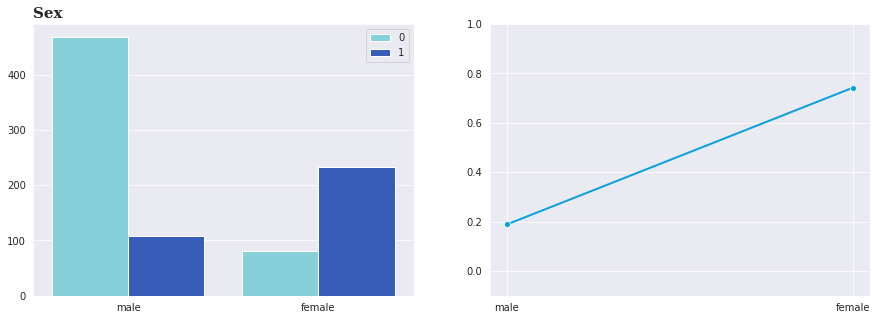

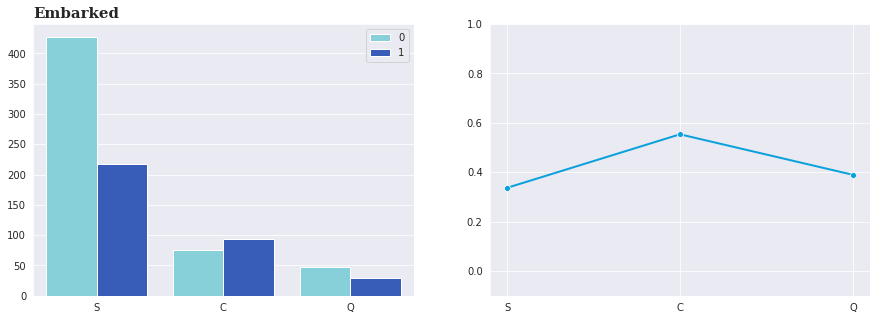

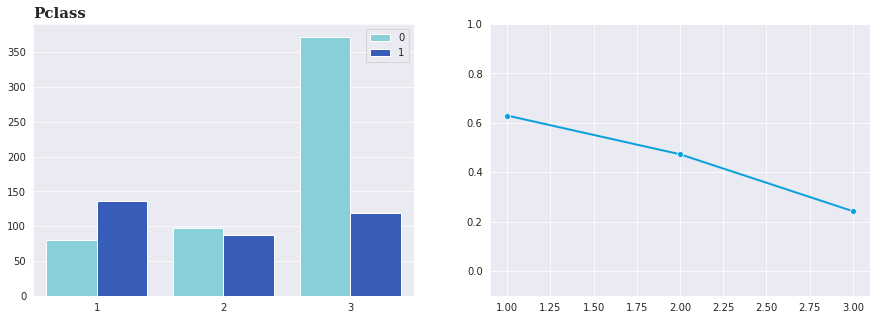

In [16]:
count_plot(train_df, 'Sex', 'Survived')
count_plot(train_df, 'Embarked', 'Survived')
count_plot(train_df, 'Pclass', 'Survived')

#### Observations

**Sex**
- More males were on board.
- Females had a higher survival rate than males did. No wonder Jack died over Rose.

**Pclass**
- Most passengers were in Pclass 3. 
- The significance of higher classes being correlated with higher survival rate is justified.
- Pclass 1 is the only class with more survived passengers than dead passengers.

**Embarked**
- A major chunk of the passengers embarked from Southampton, and the least from Queensland.
- Highest survival rate were found for passengers that embarked from C.

# Alphanumeric Features
- Create *Title* from passengers' names.
- Create *Deck* from the first letter/unit in *Cabin.*

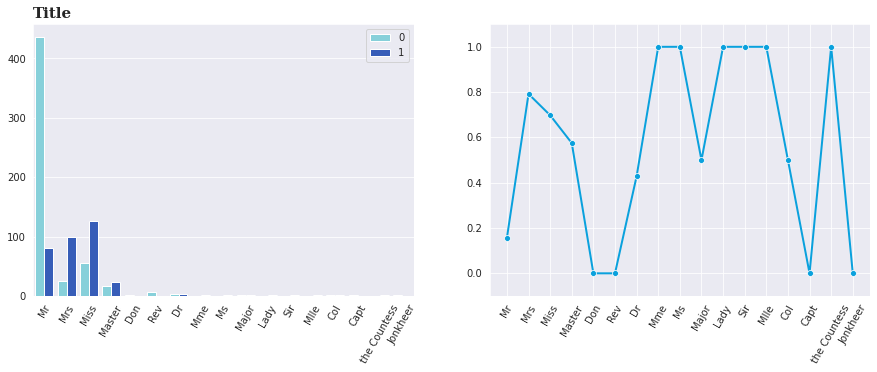

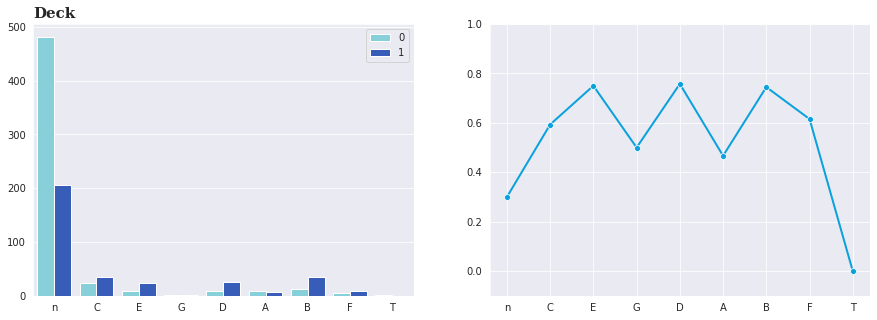

In [17]:
for dataset in df:
    # Create Title    
    # Split the full name into a list by comma, then return the title by indexing the 2nd position [1]
    # Split the name into a list by period, then return the title by indexing the 1st position [0]
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
    # Create Deck
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: str(x)[0])

# Adjust count_plot function with additional formatting (rotate x_labels)
def count_plot_adj(df, x, y):
    fig = plt.figure(figsize = (15, 5))
    
    plt.subplot(1,2,1)
    ax = sns.countplot(x=df[x], hue=df[y], palette=['#79DAE8', '#2155CD'])
    plt.legend(loc='upper right')
    plt.title(str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    plt.xticks(rotation=60)
    ax.set(xlabel=None, ylabel=None)
    
    plt.subplot(1,2,2)
    plt.ylim(-0.1, 1.1)
    ax = sns.lineplot(x=df[x], y=df[y], data=df, ci=None, linewidth=2, marker="o", color='#0AA1DD')
    plt.xticks(rotation=60)
    ax.set(xlabel=None, ylabel=None)

count_plot_adj(train_df, 'Title', 'Survived')
count_plot(train_df, 'Deck', 'Survived')

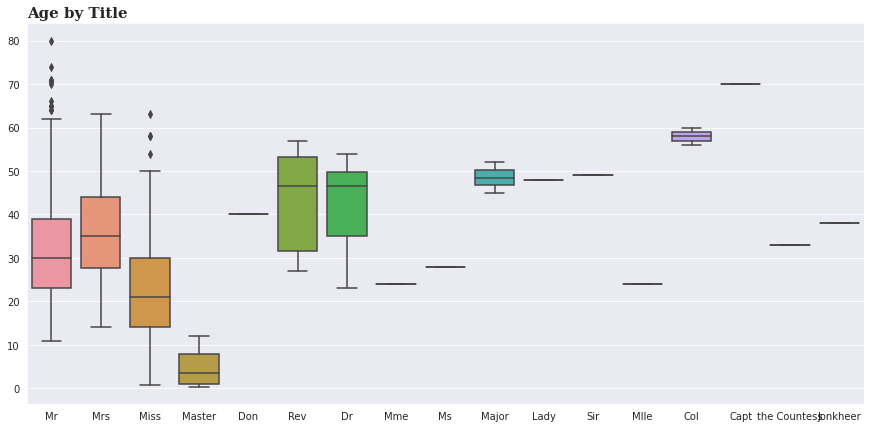

In [18]:
def box_plot_adj(df, x, y):
    
    ax = sns.boxplot(x=df[x].dropna(),
                       y=df[y].dropna(),
#                        palette=['#79DAE8', '#0AA1DD', '#2155CD']
                      )
    
    plt.title(str(y) + ' by ' + str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    ax.set(xlabel=None, ylabel=None)
    

plt.figure(figsize = (15, 7))
box_plot_adj(train_df, 'Title', 'Age')

<AxesSubplot:xlabel='Deck', ylabel='Pclass'>

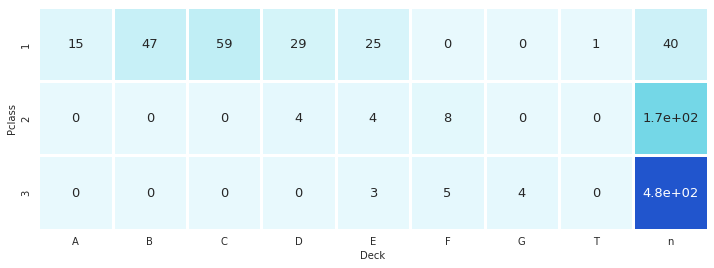

In [19]:
# Joint distribution between Pclass and Deck
Deck_Pclass = train_df.groupby(['Pclass', 'Deck'])['Deck'].size().unstack().fillna(0)
plt.subplots(figsize=(12,12))
sns.heatmap(Deck_Pclass, cmap=cmap, annot=True, annot_kws={"fontsize":13}, linewidths=3, square=True, cbar=False)

### Prefixes Meaning

- **Rev.** Ministers of most Christian denominations; ordained clergymen since 17th century.
- **Mlle, Mme, Miss.** Unmarried female; young lady.
- **Master.** Boys (<15 yrs old)
- **Major, Don.** Lord, master, or owner (of a household).
- **Col.** Colonel; army officer of high rank.
- **the Countess.** Wife or widow of a count.
- **Capt.** could refer to the captain of the ship.
- **Ms.** Any women regardless of marital status.
- **Lady.** Princesses or daughters of royal blood.
- **Jonkheer.** Female equivalent denoting the lowest rank within the nobility.

### Domain Understanding

I did some research and here is what I found:
- There are certain parts/decks in the ship that were only exclusively accessible to passengers of belonging to certain *Pclasses.*
- The **front half** of the ship reached the bottom first, followed by the other **back half** two minutes later.
- It appears that Amidships, located at the middle of the ship, is typically where most of the passengers stayed.
- A detailed list of Cabins and List can be found in the link below:
> [Titanic Facts: The Layout of the Ship | Dummies](https://www.dummies.com/article/academics-the-arts/history/20th-century/titanic-facts-the-layout-of-the-ship-180759/)
 - Cabins at Decks **A, B, C** were exclusively reserved for **Pclass 1.**
 - Cabins at Deck **D, E** were shared by all **Pclass 1, 2, 3.**
 - Cabins at Deck **F** were shared by **Pclass 2 and 3.**
 - Decks **G, T** were stated to be mostly occupied by crew members, but the presence of Pclass 1 in T makes me assume that there were only a small group of Pclass 1 there, but still dominated by Pclass 2 and 3.


- Classify *Title* based from researched information:
 - Mlle and Ms > Miss
 - Mme > Mrs
 - Uncommon titles that had a higher survival rate will be assumed/regarded as elite status > Elite
 - Remaining uncommon titles > Others


- Null values will be treated as a label. From meta-analysis alone, it can be inferred that majority of the cabin decks weren't obtained from the passengers who died.

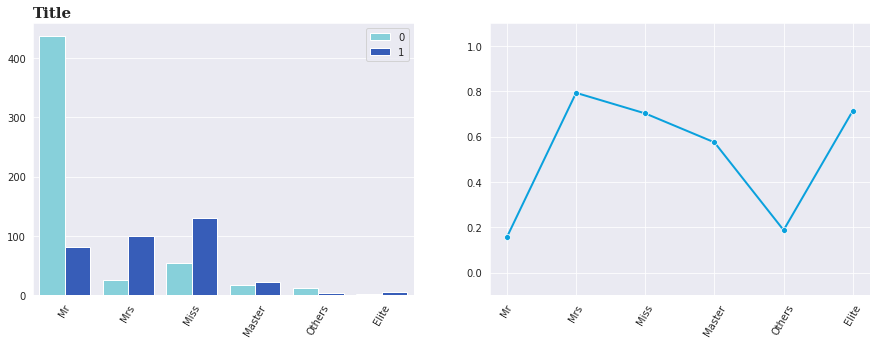

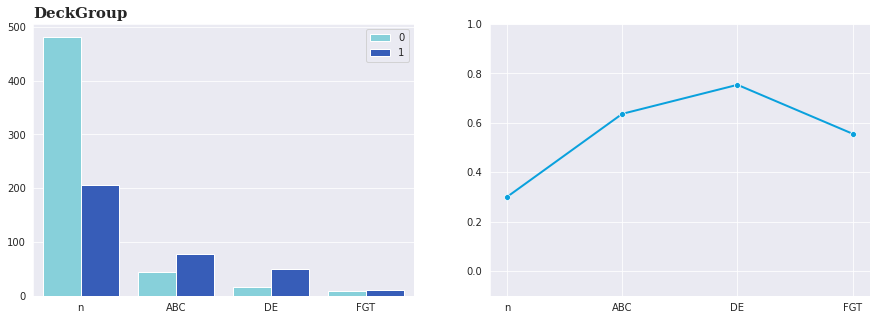

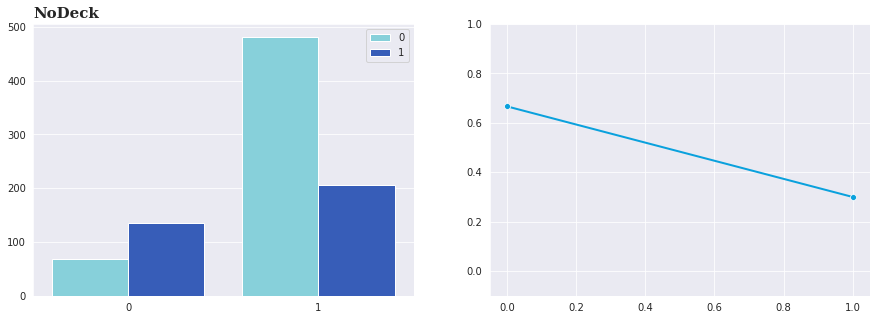

In [20]:
for dataset in df:
    
    # Classify Title
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
#     dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir','the Countess'], 'Others')
    dataset['Title'] = dataset['Title'].replace(['Col', 'Lady', 'Major', 'Sir','the Countess'], 'Elite')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Dona', 'Dr', 'Capt', 'Rev', 'Don','Jonkheer'], 'Others')
    
    # No Cabin
    dataset['NoDeck'] = 0
    dataset.loc[dataset.Deck == 'n', 'NoDeck'] = 1
    
    # DeckGroup
    dataset.loc[(dataset.Deck == 'A') |
                (dataset.Deck == 'B') |
                (dataset.Deck == 'C'), 'DeckGroup'] = 'ABC'
    
    dataset.loc[(dataset.Deck == 'D') |
                (dataset.Deck == 'E'), 'DeckGroup'] = 'DE'    
    
    dataset.loc[(dataset.Deck == 'F') |
                (dataset.Deck == 'G') |
                (dataset.Deck == 'T'), 'DeckGroup'] = 'FGT'   
    
    dataset.loc[dataset.Deck == 'n', 'DeckGroup'] = 'n'
    
count_plot_adj(train_df, 'Title', 'Survived')
count_plot(train_df, 'DeckGroup', 'Survived')
count_plot(train_df, 'NoDeck', 'Survived')

**Titles**

- It justifies the correlation between 'Sex' and 'Survived' as titles with 'Mr' and 'Master' tend to have lower survival rates than 'Mrs' and 'Miss'.
- The 'Others' category compiles a very small sample of the given dataset. Despite these titles having characterized of nobile status, it appears that they were trivial at the time of the crisis.

## Missing Values
- *Age, Fare, and Embarked.* There is no need to impute *Cabin* anymore.

In [21]:
# Remove 'Embark' null values
for dataset in df:
    dataset.dropna(subset=['Embarked'], inplace=True)

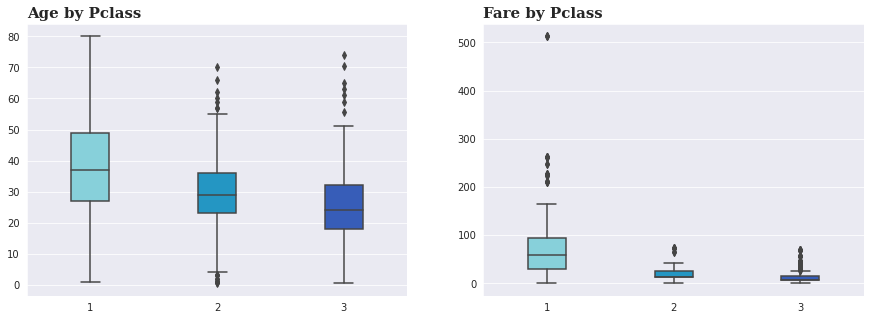

In [22]:
def box_plot(df, x, y):
    
    ax = sns.boxplot(x=df[x].dropna(),
                     y=df[y].dropna(),
                     width = .3,
                     palette=['#79DAE8', '#0AA1DD', '#2155CD'])
    plt.title(str(y) + ' by ' + str(x),
          fontsize = 15,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'left')
    
    ax.set(xlabel=None, ylabel=None)
 

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
box_plot(train_df, 'Pclass', 'Age')

plt.subplot(1, 2, 2)
box_plot(train_df, 'Pclass', 'Fare')
plt.show()

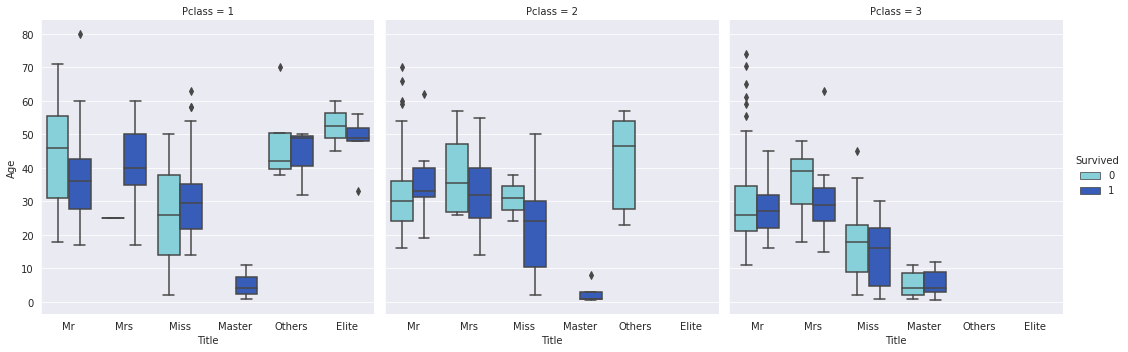

In [23]:
# g = sns.FacetGrid(train_df, row='Pclass', col='Title', hue='Survived')
# g.map(sns.boxplot, y='Age')

g = sns.catplot(data=train_df,
                x='Title',
                y='Age',
                hue="Survived",
                col="Pclass",
                kind="box",
               )

Let's imputing *Age* based from the median of its correlated features *Pclass* and *Title.*, and *Fare* based from *Pclass.*

In [24]:
# Impute missing values in 'Age' and 'Fare'
for dataset in df:
    dataset['Age'] = dataset.groupby(['Pclass', 'Title'])['Age'].apply(lambda x: x.fillna(x.median()))
    dataset['Fare'] = dataset.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.median()))

## Feature Engineering Numerical Features

- Create *FareBin* by binning *Fare*.
- Create *AgeBin* by binning *Age*.
- Create *FamilySize* by combining *SibSp* and *Parch*.

In [25]:
# Creating FamilySize
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

We can obtain the optimal number of bins by running corr() tests over a range of bin parameters through a for loop. Notice that this strategy appears viable due to the ordinal nature of *FareGroup*.

In [26]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

# Optimize bins for Fare via Pearson's corr test
# Define a function to iterate through a number of different bin values
def corr_test(x, x_bin, min, max):
    
    row = 0
    
    # Setting up dataframe where
        # i = no. of bins
        # R = Pearson's R; strength of correlation
        # p_value = statistical significance
        
    Corr = ['i', 'R', 'p_value']
    Corr_tests = pd.DataFrame(columns = Corr)

    # Select a range of values for bins to test with 
    for i in range(min, max):
        
        Corr_tests.loc[row, 'i'] = i

        # Return R, p_value and store in dataframe
        train_df[x_bin] = pd.qcut(train_df[x], i)
        train_df[x_bin] = label.fit_transform(train_df[x_bin])
        r, p = stats.pearsonr(train_df[x_bin], train_df['Survived'])

        Corr_tests.loc[row, 'R'] = r
        Corr_tests.loc[row, 'p_value'] = p

        row += 1

    # Print out dataframe
    Corr_tests.sort_values(by=['R'], ascending=False, inplace=True)
    return Corr_tests

corr_test('Fare', 'FareGroup', 2, 15)

,i,R,p_value
7,9,0.327807,0.0
9,11,0.326826,0.0
10,12,0.325878,0.0
4,6,0.322814,0.0
8,10,0.321484,0.0
12,14,0.320056,0.0
11,13,0.317878,0.0
3,5,0.314299,0.0
6,8,0.312316,0.0
5,7,0.308995,0.0


This may not be replicated for *AgeBin* because they survival varies across different demographic groups. Let's visualize it demographically.

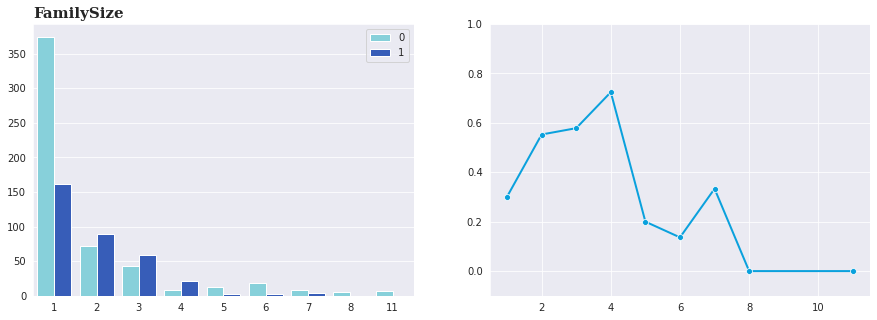

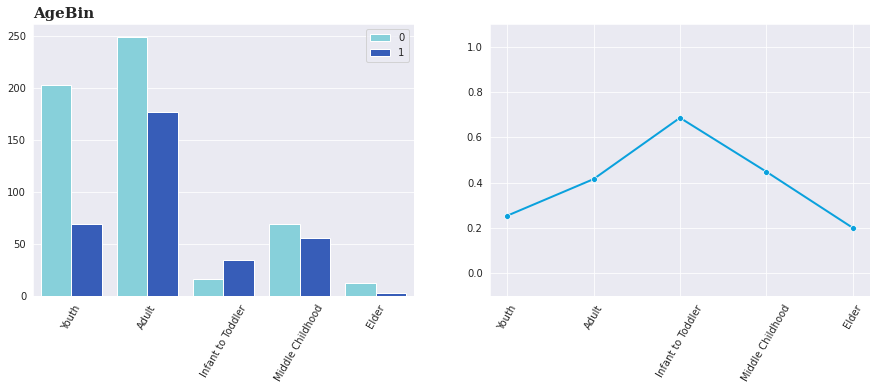

In [27]:
for dataset in df:
    dataset.loc[(dataset['Age'] <= 6), 'AgeBin'] = 'Infant to Toddler'
    dataset.loc[(dataset['Age'] > 6) & (dataset['Age'] <= 18), 'AgeBin'] = 'Middle Childhood'
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 26), 'AgeBin'] = 'Youth'
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 62), 'AgeBin'] = 'Adult'
    dataset.loc[(dataset['Age'] > 62), 'AgeBin'] = 'Elder'
    
count_plot(train_df, 'FamilySize', 'Survived')
count_plot_adj(train_df, 'AgeBin', 'Survived')

#### Insights
- If you still remember, our log transformed *Fare* was a better candidate feature with a higher correlation value compared to the frequency encoded *FareBin*. Hence, I choose to keep the transformed *Fare*.
- In *AgeBin*, it appears that the youth and elder groups have the lowest survival rates, followed by the adult and child group, while Infants to Toddlers had the highest.
- *FamilySize* can be further classified into *Alone (FamilySize=1), Small (2 to 4), Large (>5).*

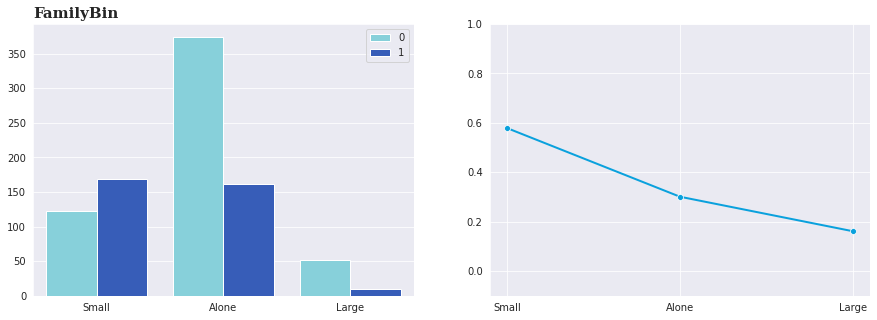

In [28]:
# Classify FamilySize
for dataset in df:
    dataset.loc[dataset['FamilySize'] == 1, 'FamilyBin'] = 'Alone'
    dataset.loc[(dataset['FamilySize'] >= 2) & (dataset['FamilySize'] <= 4), 'FamilyBin'] = 'Small'
    dataset.loc[dataset['FamilySize'] >= 5, 'FamilyBin'] = 'Large'
                 
count_plot(train_df, 'FamilyBin', 'Survived')

In [29]:
df_copy = train_df.copy()

## Correlating Categorical Features
Assessing the strength of association (correlation) across variables is one way to conduct feature selection. This time, it wouldn't be ideal to use **Pearson's correlation matrix** like what we did for our numerical variables earlier because we are now dealing with categorical variables (both the predictors and response variables). 
> However, an exception can be made if you are comparing between **two dichotomous categorical variables** (a variable that takes on one of only two possible values). For instance, *Sex* vs *Survived*.

Rather than assessing the strength between two variables, it is more viable to conduct a test of independency to assess if two categorical variables are either independent or if they are in fact related to one another. Given this premise, **[Chi-square Test of Independence](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=In%20feature%20selection%2C%20we%20aim,hypothesis%20of%20independence%20is%20incorrect.)** is the way to go.

Before we can conduct Chi-square tests, we must ensure that our categorical data are numerically encoded first using `LabelEncoder()`.

In [30]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

X_chi = df_copy[['Pclass', 'Sex', 'Embarked', 'AgeBin', 'FamilyBin', 'NoDeck', 'DeckGroup']]
y_chi = df_copy['Survived']

df_encoded = pd.DataFrame()

for i in X_chi.columns:
    X_chi[i] = label.fit_transform(X_chi[i])
      

Chi2, p = chi2(X_chi, y_chi)
data = {'Chi2': Chi2,
        'p_value': p
       }

_ = pd.DataFrame(index=X_chi.columns,
                 data=data
                )
_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Chi2,p_value
Pclass,53.111468,3.151471e-13
Sex,91.514037,1.108034e-21
Embarked,10.451601,1.225432e-03
AgeBin,20.411249,6.246158e-06
FamilyBin,66.774542,3.044041e-16
NoDeck,19.844743,8.399342e-06
DeckGroup,38.308383,6.040262e-10


**Conclusion.** All of our categorical variables are significantly dependent on our target variable.

# Data Preprocessing

In [31]:
# Log transform Fare
# Label encode Sex
for dataset in df:
    dataset['Fare'] = np.log(dataset['Fare']+1)
    dataset['Sex'] = label.fit_transform(dataset['Sex'])

In [32]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,NoDeck,DeckGroup,FamilySize,FareGroup,AgeBin,FamilyBin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,NaN,S,Mr,n,1,n,2,1,Youth,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C85,C,Mrs,C,0,ABC,2,12,Adult,Small
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,Miss,n,1,n,1,3,Youth,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,C123,S,Mrs,C,0,ABC,2,11,Adult,Small
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,NaN,S,Mr,n,1,n,1,3,Adult,Alone
5,6,0,3,"Moran, Mr. James",1,26.0,0,0,330877,2.246893,NaN,Q,Mr,n,1,n,1,4,Youth,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,3.967694,E46,S,Mr,E,0,DE,1,11,Adult,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,3.094446,NaN,S,Master,n,1,n,5,8,Infant to Toddler,Large
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,2.495954,NaN,S,Mrs,n,1,n,3,5,Adult,Small
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,3.436268,NaN,C,Mrs,n,1,n,2,10,Middle Childhood,Small


In [33]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,NoDeck,DeckGroup,FamilySize,AgeBin,FamilyBin
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.178064,NaN,Q,Mr,n,1,n,1,Adult,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,2.079442,NaN,S,Mrs,n,1,n,2,Adult,Small
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.369075,NaN,Q,Mr,n,1,n,1,Adult,Alone
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.268252,NaN,S,Mr,n,1,n,1,Adult,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.586824,NaN,S,Mrs,n,1,n,3,Youth,Small
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,2.324836,NaN,S,Mr,n,1,n,1,Middle Childhood,Alone
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,2.155152,NaN,Q,Miss,n,1,n,1,Adult,Alone
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,3.401197,NaN,S,Mr,n,1,n,3,Youth,Small
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,2.107689,NaN,C,Mrs,n,1,n,1,Middle Childhood,Alone
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,3.224858,NaN,S,Mr,n,1,n,3,Youth,Small


In [34]:
# Store relevant columns
y_train = train_df['Survived']

X_train = train_df[['Pclass', 'Sex', 'Fare', 'Embarked', 'AgeBin', 'DeckGroup', 'FamilyBin']]
X_test = test_df[['Pclass', 'Sex', 'Fare', 'Embarked', 'AgeBin', 'DeckGroup', 'FamilyBin']]

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Creating dummy indicator columns for categorical variables
X_train = pd.get_dummies(X_train, columns=['Embarked', 'AgeBin', 'FamilyBin', 'DeckGroup'])
X_test = pd.get_dummies(X_test, columns=['Embarked', 'AgeBin', 'FamilyBin', 'DeckGroup'])

# Scale num features
X_train[['Fare', 'Pclass']] = scale.fit_transform(X_train[['Fare', 'Pclass']])
X_test[['Fare', 'Pclass']] = scale.transform(X_test[['Fare', 'Pclass']])

In [36]:
X_train

,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeBin_Adult,AgeBin_Elder,AgeBin_Infant to Toddler,AgeBin_Middle Childhood,AgeBin_Youth,FamilyBin_Alone,FamilyBin_Large,FamilyBin_Small,DeckGroup_ABC,DeckGroup_DE,DeckGroup_FGT,DeckGroup_n
0,0.825209,1,-0.877591,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,-1.572211,0,1.366380,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,0.825209,0,-0.796281,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
3,-1.572211,0,1.066796,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0
4,0.825209,1,-0.781901,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.373501,1,-0.330815,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
887,-1.572211,0,0.491068,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
888,0.825209,0,0.245663,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
889,-1.572211,1,0.491068,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0


# Preliminary Model Training
I begin training my model by creating a baseline assessment to determine which among the algorithms perform well based on my train and test sets, and work my way towards hyperparameter tuning and ensembling from there. Since I am working with a given dataset with a predetermined solution goal, I am running a form of machine learning algorithm known as supervised learning. Listed below are some common model algorithms to try out.

> If you want to understand the math and fundamentals behind each ML algorithm, I highly recommend watching video tutorials by *StatQuest with Josh Starmer.*

- [Logistic Regression](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjdkvWQ4qT3AhVEQd4KHUvNDPIQwqsBegQIFhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DyIYKR4sgzI8&usg=AOvVaw3maZPWy-T2rEc4PFDM40af)
- [Support Vector Machines](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjM0pq45KT3AhVcQfUHHVYJBysQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DefR1C6CvhmE&usg=AOvVaw1alnpuy6aMk4ogaK4NtmXy)
- [K-Means Nearest Neighbors](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj60qDK5KT3AhUbAYgKHcyoDbAQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DHVXime0nQeI&usg=AOvVaw1h03i8dfC0gXYPU9lFRzJ_)
- [Decision Tree](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi-t-rS5KT3AhWGAogKHbBfBGQQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D7VeUPuFGJHk&usg=AOvVaw2KBODG3Oh7AiSz-4h5wnMd)
- [Random Forest](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiyptHZ5KT3AhWNEYgKHelnCqgQwqsBegQIAhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DJ4Wdy0Wc_xQ&usg=AOvVaw0moI0sPTwd34hRAKxbDRVN)
- XGBoost
- LGBMClassifier
- CatBoost

Another important approach which is crucial here is to conduct cross validation. It is a useful technique to address overfitting as it evaluates models through a fixed number of folds k. In my case, I decided to do 10-fold cross-validation. In other words, I do 10 different subsets of sample from training set to arrive at my solutions, then get the mean of all the accuracy scores from these tests.

In [37]:
from sklearn.model_selection import cross_val_score

#Common Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Defining a list of Machine Learning Algorithms I will be running
MLA = [
    LogisticRegression(max_iter = 2000),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose=False)
]

row_index = 0

# Setting up the table to compare the performances of each model
MLA_cols = ['Model', 'Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_cols)

# Iterate and store scores in the table
for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    MLA_compare.loc[row_index, 'Accuracy'] = cv_results.mean()
    
    row_index+=1

# Present table
MLA_compare.sort_values(by=['Accuracy'], ascending=False, inplace=True)
MLA_compare

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy
7,CatBoostClassifier,0.832444
6,LGBMClassifier,0.824566
5,XGBClassifier,0.818922
0,LogisticRegression,0.81665
1,SVC,0.814428
4,RandomForestClassifier,0.802081
2,KNeighborsClassifier,0.796425
3,DecisionTreeClassifier,0.790807


# Hyperparameter Tuning

I opted to use optuna, no pun intended, to run my optimizations on my Gradient Boost algorithms.
1. CatBoost
2. LGBM
3. XGBoost

So, why did I consider using these as opposed to the conventional way with `GridSearchCV` or `RandomSearchCV`?
- It offers greater versatility in selecting and customizing my grid of parameters.

Another strategy that I implemented is to tune my hyperparameters for each cross validation fold through a **for loop.** What makes this approach more effective?
- Likewise how we want to cross validate on training model algorithms to ensure we get a more robust outcome/score by getting the most of the combinations/folds from the whole data, applying this on optimization runs also ensures that our hyperparameter candidate sets will also be tested and evaluated on the whole dataset.

- This also enables me to define a very useful parameter `early_stopping_rounds` when I fit my models in each CV fold.
> I set this to 100, this means that if the predictions don't improve after 100 trials, the training will stop.

In [38]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

# Hypertune XGBoost
def objective(trial, data=X_train , target=y_train):

    param = {
        'n_estimators': 5000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9])
    }    
    
    cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=42)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    
        model = XGBClassifier(**param, use_label_encoder = False)
        
        model.fit(x_trn,
                  y_trn,
                  eval_set = [(x_val, y_val)],
                  early_stopping_rounds = 100,
                  eval_metric = 'logloss',
                  verbose = False
                 )
    
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)
        
    return np.mean(scores)

In [39]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# print(f"\tBest score: {study.best_value:.5f}")
# print(f"\tBest params:", study.best_trial.params)

In [40]:
# Hypertune LGBM
from optuna.integration import LightGBMPruningCallback
from lightgbm import early_stopping

def objective(trial, data=X_train , target=y_train):

    param = {
        'n_estimators': 5000,
        'num_leaves': trial.suggest_int('num_leaves', 20, 3000, step=20),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 200, 10000, step=100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9])
    }    
    
    cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=42)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    
        model = LGBMClassifier(**param)
        
        model.fit(x_trn,
                  y_trn,
                  eval_set = [(x_val, y_val)],
                  eval_metric = 'logloss',
                  callbacks = [early_stopping(stopping_rounds=100,
                                              verbose = False)],
                  verbose = False
                 )
    
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)
        
    return np.mean(scores)

In [41]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# print(f"\tBest score: {study.best_value:.5f}")
# print(f"\tBest params:", study.best_trial.params)

In [42]:
# Hypertune CatBoost
def objective(trial, data=X_train , target=y_train):

    param = {
        'n_estimators': 5000,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_categorical('subsample', [0.5, 0.6, 0.7, 0.8, 0.9])
    }    
    
    cv = StratifiedKFold( n_splits=5, shuffle=True, random_state=42)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train)):
        
        x_trn, x_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_trn, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]

    
        model = CatBoostClassifier(**param)
        
        model.fit(x_trn,
                  y_trn,
                  eval_set = [(x_val, y_val)],
                  early_stopping_rounds = 100,
                  verbose = False
                 )
    
        preds = model.predict(x_val)
        scores = accuracy_score(y_val, preds)
        
    return np.mean(scores)

In [43]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# print(f"\tBest score: {study.best_value:.5f}")
# print(f"\tBest params:", study.best_trial.params)

In [44]:
# Optimal parameters
cat_params = {'learning_rate': 0.08568484131642878, 'max_depth': 8, 'subsample': 0.8}
lgbm_params = {'num_leaves': 80, 'learning_rate': 0.19028248813460252, 'max_depth': 6, 'min_child_samples': 9, 'reg_alpha': 0.022198765317398134, 'reg_lambda': 0.0054486752392737745, 'subsample': 0.5}
xgb_params = {'learning_rate': 0.04366702374982929, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.8}

# Ensemble Learning
This method aims to improve the model by combining multiple algorithms and classifications in order to reduce the biases while also addressing the weaknesses of using standalone models. There are actually several methods of ensemble learning, listed below are some:
- Majority Voting
- Bagging
- Boosting
- Gradient Boosting
- Random Forests
- Stacking

For now, I will only delve into using the Majority Voting Classifier first as a working example. From the name itself, a voting ensemble involves favoring the class label (i.e. 1=Survived, 0=Died) with the majority or the most votes as the prediction. They are two types of voting:
- **Hard voting.** summing the votes of class labels from other models and selecting the class label with the most votes as the prediction.
- **Soft voting.** summing the predicted probabilities of classes from other models and selecting the class label with largest sum probability as the prediction.

In [45]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

xgb_optimal = XGBClassifier(**xgb_params)
lgbm_optimal = LGBMClassifier(**lgbm_params)
cat_optimal = CatBoostClassifier(**cat_params)

# Creating ensembles for top 3 tuned models
Ensemble_HV = VotingClassifier(estimators =
                               [('XGB', xgb_optimal),
                                ('Cat', cat_optimal),
                                ('LGBM', lgbm_optimal)],
                               voting = 'hard')

Ensemble_SV = VotingClassifier(estimators =
                               [('XGB', xgb_optimal),
                                ('Cat', cat_optimal),
                                ('LGBM', lgbm_optimal)],
                               voting = 'soft')

# Submit Predictions

In [46]:
# Defining a function to predict solutions
def predict(model):
    
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    pred = pd.DataFrame({
    'PassengerId': test_df_copy['PassengerId'],
    'Survived': Y_pred
})
     
    return pred

In [47]:
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier()

In [48]:
predict(xgb).to_csv('submission_xgb.csv', index=False)
predict(lgbm).to_csv('submission_lgbm.csv', index=False)
predict(cat).to_csv('submission_cat.csv', index=False)

predict(xgb_optimal).to_csv('submission_xgb_optimal.csv', index=False)
predict(lgbm_optimal).to_csv('submission_lgbm_optimal.csv', index=False)
predict(cat_optimal).to_csv('submission_xgb_optimal.csv', index=False)

predict(Ensemble_HV).to_csv('submission_HV.csv', index=False)
predict(Ensemble_SV).to_csv('submission_SV.csv', index=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.009797
0:	learn: 0.6868704	total: 1.13ms	remaining: 1.13s
1:	learn: 0.6796408	total: 2.58ms	remaining: 1.28s
2:	learn: 0.6727298	total: 3.93ms	remaining: 1.3s
3:	learn: 0.6660732	total: 5.21ms	remaining: 1.3s
4:	learn: 0.6605330	total: 6.54ms	remaining: 1.3s
5:	learn: 0.6545657	total: 7.84ms	remaining: 1.3s
6:	learn: 0.6494276	total: 9.11ms	remaining: 1.29s
7:	learn: 0.6430623	total: 10.4ms	remaining: 1.29s
8:	learn: 0.6369208	total: 11.7ms	remaining: 1.29s
9:	learn: 0.6323865	total: 12.5ms	remaining: 1.24s
10:	learn: 0.6265815	total: 13.7ms	remaining: 1.24s
11:	learn: 0.6213562	total: 15.1ms	remaining: 1.24s
12:	learn: 0.6157932	total: 16.4ms	remaining: 1.25s
13:	learn: 0.6108062	total: 17.7ms	remaining: 1.25s
14:	

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0:	learn: 0.6412394	total: 1.17ms	remaining: 1.16s
1:	learn: 0.5904834	total: 5.26ms	remaining: 2.62s
2:	learn: 0.5575585	total: 6.47ms	remaining: 2.15s
3:	learn: 0.5242428	total: 7.88ms	remaining: 1.96s
4:	learn: 0.4948630	total: 10.2ms	remaining: 2.03s
5:	learn: 0.4849836	total: 10.7ms	remaining: 1.77s
6:	learn: 0.4633551	total: 12.3ms	remaining: 1.74s
7:	learn: 0.4459379	total: 13.8ms	remaining: 1.71s
8:	learn: 0.4363125	total: 14.3ms	remaining: 1.57s
9:	learn: 0.4285659	total: 14.8ms	remaining: 1.47s
10:	learn: 0.4188057	total: 16.6ms	remaining: 1.49s
11:	learn: 0.4103614	total: 18.1ms	remaining: 1.49s
12:	learn: 0.4021853	total: 20ms	remaining: 1.51s
13:	learn: 0.3976703	total: 20.6ms	remaining: 1.45s
14:	learn: 0.3905969	total: 22.5ms	remaining: 1.48s
15:	learn: 0.3863207	total: 24.8ms	remaining: 1.52s
16:	learn: 0.3831165	total: 26.2ms	remaining: 1.51s
17:	learn: 0.3794276	total: 26.9ms	remaining: 1.47s
18:	learn: 0.3754904	total: 28.9ms	remaining: 1.49s
19:	learn: 0.3721015	tot

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6412394	total: 1.36ms	remaining: 1.35s
1:	learn: 0.5904834	total: 3.76ms	remaining: 1.88s
2:	learn: 0.5575585	total: 5.1ms	remaining: 1.7s
3:	learn: 0.5242428	total: 6.74ms	remaining: 1.68s
4:	learn: 0.4948630	total: 9.71ms	remaining: 1.93s
5:	learn: 0.4849836	total: 10.6ms	remaining: 1.76s
6:	learn: 0.4633551	total: 13.2ms	remaining: 1.87s
7:	learn: 0.4459379	total: 16.3ms	remaining: 2.02s
8:	learn: 0.4363125	total: 17.2ms	remaining: 1.9s
9:	learn: 0.4285659	total: 18.1ms	remaining: 1.79s
10:	learn: 0.4188057	total: 20.7ms	remaining: 1.86s
11:	learn: 0.4103614	total: 23.5ms	remaining: 1.94s
12:	learn: 0.4021853	total: 26ms	remaining: 1.97s
13:	learn: 0.3976703	total: 27.1ms	remaining: 1.91s
14:	learn: 0.3905969	total: 29.4ms	

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6412394	total: 1.36ms	remaining: 1.36s
1:	learn: 0.5904834	total: 3.11ms	remaining: 1.55s
2:	learn: 0.5575585	total: 4.18ms	remaining: 1.39s
3:	learn: 0.5242428	total: 6.71ms	remaining: 1.67s
4:	learn: 0.4948630	total: 10.3ms	remaining: 2.06s
5:	learn: 0.4849836	total: 11.8ms	remaining: 1.96s
6:	learn: 0.4633551	total: 14ms	remaining: 1.99s
7:	learn: 0.4459379	total: 16ms	remaining: 1.98s
8:	learn: 0.4363125	total: 16.6ms	remaining: 1.83s
9:	learn: 0.4285659	total: 17.3ms	remaining: 1.72s
10:	learn: 0.4188057	total: 19.2ms	remaining: 1.73s
11:	learn: 0.4103614	total: 21.3ms	remaining: 1.76s
12:	learn: 0.4021853	total: 23.5ms	remaining: 1.79s
13:	learn: 0.3976703	total: 24.3ms	remaining: 1.71s
14:	learn: 0.3905969	total: 26.2ms

#### Update Logs (Version 2)
- Introduced new model alogirthms `XGBoostClassifier`, `LGBMClassifier`, `CatBoostClassifier` for comparison in model training
- Integrated `optuna` in hyperparameter tuning.
- Employed advanced feature engineering to come up with more robust and meaningful features such as *AgeBin, FareBin, and FamilyBin*.
- Enhanced the readability and aesthetics of visualizations

Any form of feedback and advise are welcome. If you have any questions and clarifications regarding my code and work, feel free to ask them in the comments section and I will be happy to engage and answer them.

### My Other Works
If you are interested, you can go to my Kaggle profile [HERE](https://www.kaggle.com/shilongzhuang) and browse through my other works and contributions.

---
# References
Special thanks and credits to these informative resources (notebooks) and guides created by talented professionals in the field.
- [A Data Science Framework: To Achieve 99% Accuracy | Kaggle](https://www.kaggle.com/code/shilongzhuang/a-data-science-framework-to-achieve-99-accuracy/edit)
- [Titanic Data Science Solutions | Kaggle](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)